In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sb

import xgboost as xgb
from xgboost import XGBClassifier



from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [5]:
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df_train = pd.read_csv(r'C:\Users\lenovossd\Downloads\anomaly-detection\train.csv')
df_train.head(2)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.07250
1,1425008873,41,False,50.70939


In [7]:
df_train['is_anomaly'] = df_train['is_anomaly'].replace(False,0).replace(True,1)
df_train['is_anomaly'].value_counts()

C:\Users\lenovossd\AppData\Local\Temp\ipykernel_12932\3076744821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['is_anomaly'] = df_train['is_anomaly'].replace(False,0).replace(True,1)


is_anomaly
0    15054
1      776
Name: count, dtype: int64

In [8]:
df_train.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [9]:
df_train.describe()

,timestamp,value,is_anomaly,predicted
count,1.583000e+04,15830.000000,15830.000000,15830.000000
mean,1.427383e+09,85.572205,0.049021,71.870715
std,1.370962e+06,321.760918,0.215918,92.450520
min,1.425009e+09,0.000000,0.000000,-281.389070
25%,1.426196e+09,29.000000,0.000000,32.919171
50%,1.427383e+09,47.000000,0.000000,49.771124
75%,1.428570e+09,76.000000,0.000000,75.948052
max,1.429757e+09,13479.000000,1.000000,2716.127200


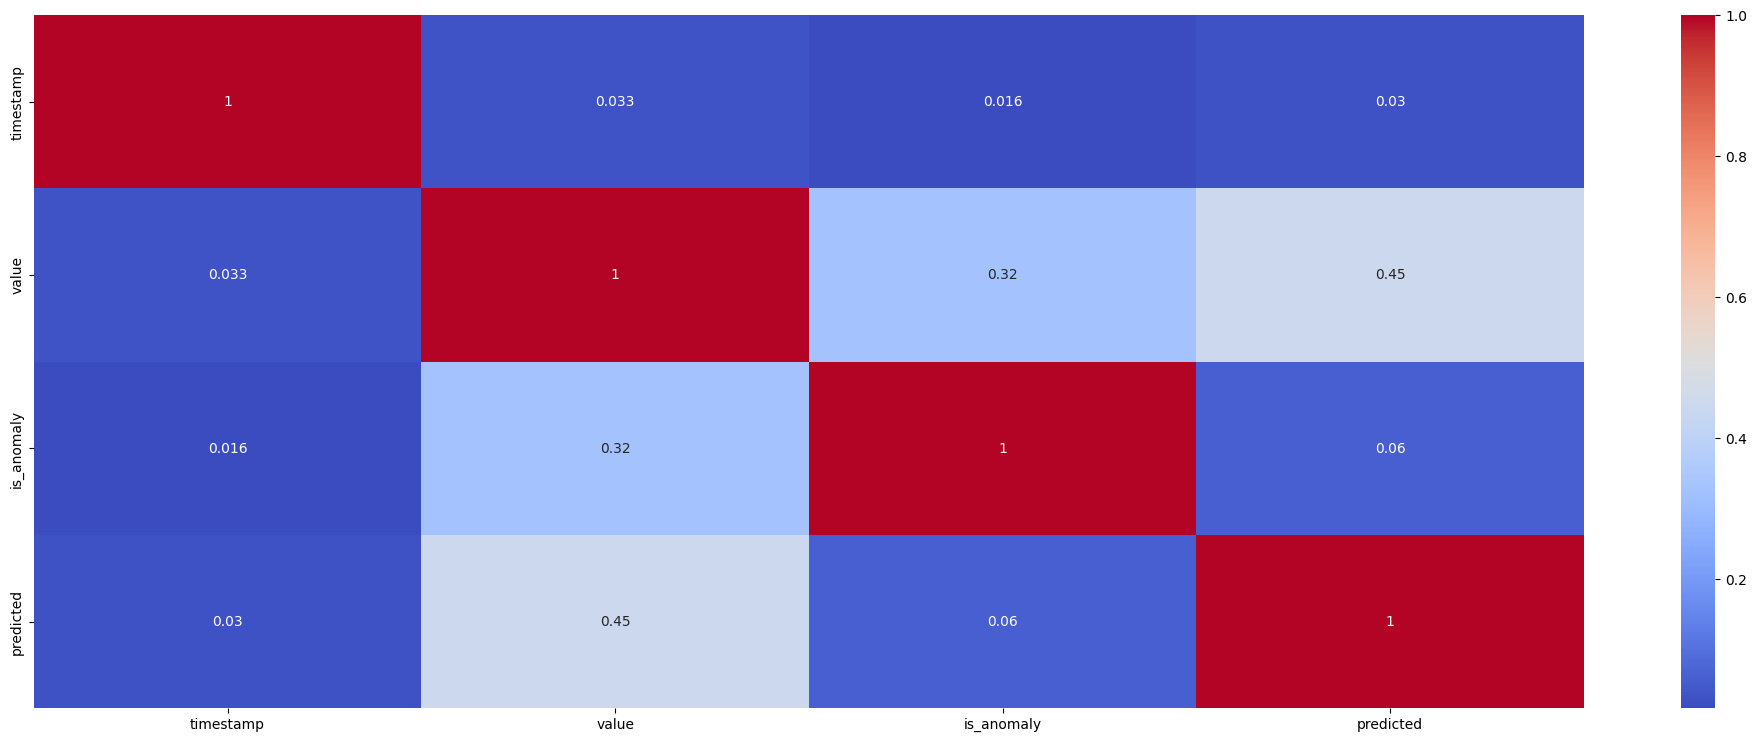

In [10]:
plt.figure(figsize=(25, 9))
sb.heatmap(df_train.corr(),annot=True,cmap='coolwarm')
plt.show()

<Axes: xlabel='predicted', ylabel='value'>

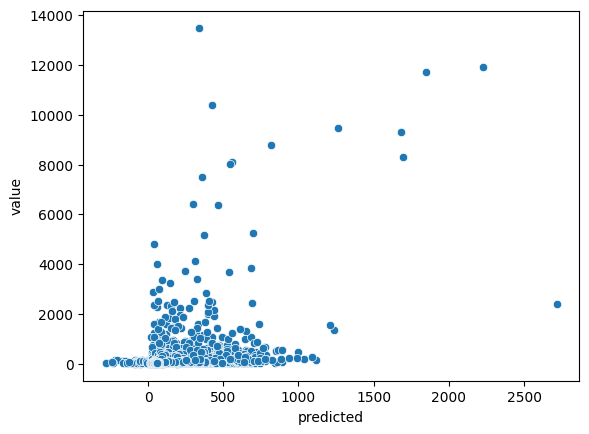

In [11]:
sb.scatterplot(x=df_train['predicted'], y=df_train['value'])

In [12]:
print("Total No of Transactions:",df_train.size)

Fraud_df = df_train[df_train['is_anomaly']==True]
print("No of Anomalous Transactions:",len(Fraud_df))

Valid_df = df_train[df_train['is_anomaly']==False]
print("No of Valid Transactions:",len(Valid_df))

outlier_fraction = len(Fraud_df)/float(len(df_train))
valid_fraction = len(Valid_df)/float(len(df_train))
print("Percentage of Anomalous Transactions:",round((outlier_fraction*100),3))
print("Percentage of Valid Transactions:",round((valid_fraction*100),3))

Total No of Transactions: 63320
No of Anomalous Transactions: 776
No of Valid Transactions: 15054
Percentage of Anomalous Transactions: 4.902
Percentage of Valid Transactions: 95.098


In [13]:
X = df_train.drop(columns=['is_anomaly'],inplace=False,axis=1)
X.head(2)

,timestamp,value,predicted
0,1425008573,42,44.07250
1,1425008873,41,50.70939


In [14]:
y = df_train['is_anomaly']
y.head(3)

0    0
1    0
2    0
Name: is_anomaly, dtype: int64

In [15]:
X.shape
X_train = X.copy(deep=True)
y_train  = y.copy(deep=True)

In [16]:
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X_train.shape[0], X_train.shape[1]))

In [17]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100,
                                       max_samples=len(X_train), 
                                       contamination=outlier_fraction,
                                       random_state=state, 
                                       verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,
                                              algorithm='auto', 
                                              leaf_size=30, 
                                              metric='minkowski',
                                              novelty=False,
                                              p=2, metric_params=None,
                                              contamination=outlier_fraction),
    "Novelty Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                                      novelty=True,p=2, metric_params=None, 
                                                      contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1),
    "XGBClassifier":XGBClassifier(objective="binary:logistic", random_state=42)
}

################################################################################################
Isolation Forest: 1026
Accuracy Score :0.94
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15054
           1       0.34      0.34      0.34       776

    accuracy                           0.94     15830
   macro avg       0.65      0.65      0.65     15830
weighted avg       0.94      0.94      0.94     15830

################################################################################################
Local Outlier Factor: 1244
Accuracy Score :0.92
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15054
           1       0.20      0.20      0.20       776

    accuracy                           0.92     15830
   macro avg       0.58      0.58      0.58     15830
weighted avg       0.92      0.92      0.92     15830

############

C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


################################################################################################
Support Vector Machine: 12204
Accuracy Score :0.23
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.20      0.33     15054
           1       0.05      0.80      0.09       776

    accuracy                           0.23     15830
   macro avg       0.50      0.50      0.21     15830
weighted avg       0.91      0.23      0.32     15830

################################################################################################
XGBClassifier: 776
Accuracy Score :0.95
Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15054
           1       0.00      0.00      0.00       776

    accuracy                           0.95     15830
   macro avg       0.48      0.50      0.49     15830
weighted avg       0.90      0.95      0.93     15830



C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

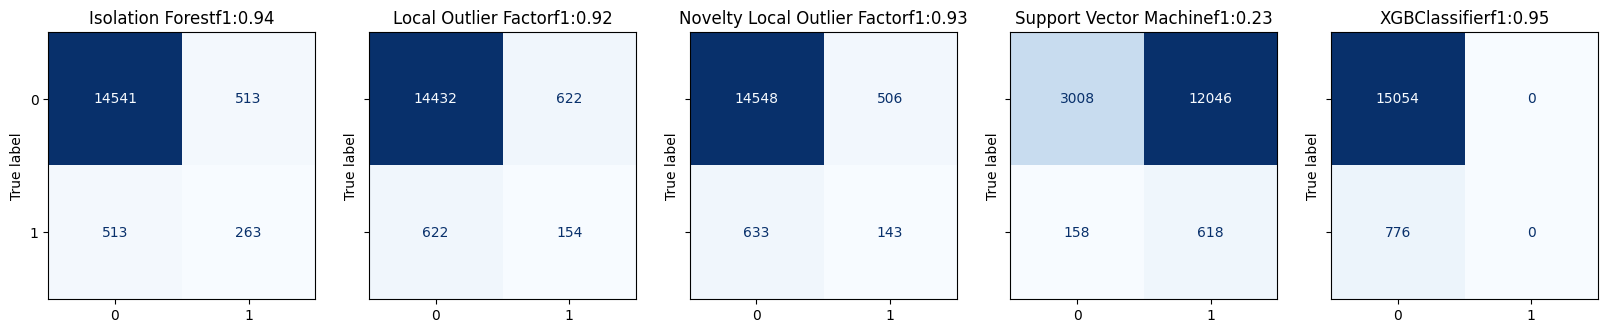

In [18]:
f, axes = plt.subplots(1, 5, figsize=(20, 10), sharey='row')
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    print("###"*32)
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    elif clf_name == "Novelty Local Outlier Factor":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
        scores_prediction = clf.negative_outlier_factor_  
    elif clf_name == "XGBClassifier":
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)
#     Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    ac_score = accuracy_score(y_train,y_pred)
    
    print(f"Accuracy Score :{round(ac_score,2)}")
    print("Classification Report :")
    print(classification_report(y_train,y_pred))
    cf_matrix = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], values_format='.0f',cmap = "Blues")
    axes[i].set_title(clf_name+"f1:"+str(round(ac_score,2)))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

In [19]:
X_test = pd.read_csv(r"C:\Users\lenovossd\Downloads\anomaly-detection\test.csv")


In [20]:
clf  = XGBClassifier(objective="binary:logistic", random_state=42)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

In [21]:
data={"timestamp":[],"is_anomaly":[]}
for id,pred in zip(X["timestamp"].unique(),y_test_pred):
    data["timestamp"].append(id)
    data["is_anomaly"].append(pred)

In [22]:
output=pd.DataFrame(data,columns=["timestamp","is_anomaly"])
output.head(2)

,timestamp,is_anomaly
0,1425008573,0
1,1425008873,0


In [23]:
y = df_train['is_anomaly']
y.head(3)

0    0
1    0
2    0
Name: is_anomaly, dtype: int64

In [24]:
X.shape
X_train = X.copy(deep=True)
y_train  = y.copy(deep=True)

In [25]:
state = np.random.RandomState(42)
X_outliers = state.uniform(low=0, high=1, size=(X_train.shape[0], X_train.shape[1]))

In [26]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100,
                                       max_samples=len(X_train), 
                                       contamination=outlier_fraction,
                                       random_state=state, 
                                       verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,
                                              algorithm='auto', 
                                              leaf_size=30, 
                                              metric='minkowski',
                                              novelty=False,
                                              p=2, metric_params=None,
                                              contamination=outlier_fraction),
    "Novelty Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                                      novelty=True,p=2, metric_params=None, 
                                                      contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1),
    "XGBClassifier":XGBClassifier(objective="binary:logistic", random_state=42)
}

################################################################################################
Isolation Forest: 1026
Accuracy Score :0.94
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     15054
           1       0.34      0.34      0.34       776

    accuracy                           0.94     15830
   macro avg       0.65      0.65      0.65     15830
weighted avg       0.94      0.94      0.94     15830

################################################################################################
Local Outlier Factor: 1244
Accuracy Score :0.92
Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     15054
           1       0.20      0.20      0.20       776

    accuracy                           0.92     15830
   macro avg       0.58      0.58      0.58     15830
weighted avg       0.92      0.92      0.92     15830

############

C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


################################################################################################
Support Vector Machine: 12204
Accuracy Score :0.23
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.20      0.33     15054
           1       0.05      0.80      0.09       776

    accuracy                           0.23     15830
   macro avg       0.50      0.50      0.21     15830
weighted avg       0.91      0.23      0.32     15830

################################################################################################
XGBClassifier: 776
Accuracy Score :0.95
Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15054
           1       0.00      0.00      0.00       776

    accuracy                           0.95     15830
   macro avg       0.48      0.50      0.49     15830
weighted avg       0.90      0.95      0.93     15830



C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovossd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

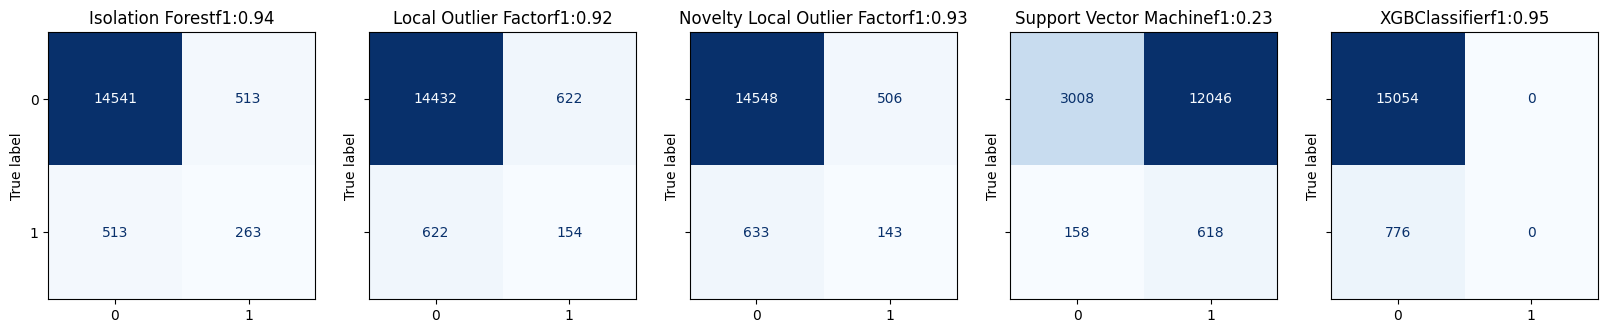

In [27]:
f, axes = plt.subplots(1, 5, figsize=(20, 10), sharey='row')
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    print("###"*32)
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    elif clf_name == "Novelty Local Outlier Factor":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
        scores_prediction = clf.negative_outlier_factor_  
    elif clf_name == "XGBClassifier":
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)
#     Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    ac_score = accuracy_score(y_train,y_pred)
    
    print(f"Accuracy Score :{round(ac_score,2)}")
    print("Classification Report :")
    print(classification_report(y_train,y_pred))
    cf_matrix = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], values_format='.0f',cmap = "Blues")
    axes[i].set_title(clf_name+"f1:"+str(round(ac_score,2)))
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

In [28]:
X_test=pd.read_csv(r"C:\Users\lenovossd\Downloads\anomaly-detection\test.csv")

In [29]:
clf  = XGBClassifier(objective="binary:logistic", random_state=42)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)

In [30]:
data={"timestamp":[],"is_anomaly":[]}
for id,pred in zip(X["timestamp"].unique(),y_test_pred):
    data["timestamp"].append(id)
    data["is_anomaly"].append(pred)

In [31]:
output=pd.DataFrame(data,columns=["timestamp","is_anomaly"])
output.head(2)

,timestamp,is_anomaly
0,1425008573,0
1,1425008873,0


In [32]:
output['is_anomaly'].value_counts()

is_anomaly
0    3948
1      12
Name: count, dtype: int64

In [33]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
output['is_anomaly'].value_counts()

Your submission was successfully saved!


is_anomaly
0    3948
1      12
Name: count, dtype: int64